# Name: Prashant Puri

# I'd: 2059631

# Iris Species Classification

# Introduction

- Iris dataset is the Hello World for the Data Science, so if you have started your career in Data Science and Machine Learning you will be practicing basic ML algorithms on this famous dataset. Iris dataset contains five columns such as Petal Length, Petal Width, Sepal Length, Sepal Width and Species Type.

- Iris is a flowering plant, the researchers have measured various features of the different iris flowers and recorded digitally

- The iris dataset contains the following data

    a. 50 samples of 3 different species of iris (150 samples total)

    b. There are 50 observations of each species for a total of 150 observations with 4 features each (sepal length, sepal      width, petal length, petal width).
    

- Measurements: sepal length, sepal width, petal length, petal width

- The format for the data: (sepal length, sepal width, petal length, petal width)
    
The 4 features are
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm

The target class
The flower species type is the target class and it having 3 types

- Setosa
- Versicolor
- Virginica

# Importing the Necessary Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,auc,roc_auc_score
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings('ignore') #ignore warning messages 


# EDA(Exploratory Data Analysis)

# 1. Understand the data

In [2]:
data = pd.read_csv('Iris.csv')
data 

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# checking dimension (num of rows and columns) of dataset
print("iris data shape (Rows, Columns):", data.shape)

iris data shape (Rows, Columns): (150, 6)


In [4]:
# import first & last 5 rows
display(data.head())
display(data.tail())

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


,Id,sepal_length,sepal_width,petal_length,petal_width,species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Displaying the number of rows randomly
data.sample(10)

,Id,sepal_length,sepal_width,petal_length,petal_width,species
143,144,6.8,3.2,5.9,2.3,Iris-virginica
27,28,5.2,3.5,1.5,0.2,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
103,104,6.3,2.9,5.6,1.8,Iris-virginica
35,36,5.0,3.2,1.2,0.2,Iris-setosa
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
40,41,5.0,3.5,1.3,0.3,Iris-setosa
88,89,5.6,3.0,4.1,1.3,Iris-versicolor
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
38,39,4.4,3.0,1.3,0.2,Iris-setosa


In [6]:
# check dataframe structure like columns and its counts, datatypes & Null Values
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


None

In [7]:
data.columns.tolist()

['Id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [8]:
data.describe()

,Id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
print('Iris-setosa')
setosa = data['species'] == 'Iris-setosa'
print(data[setosa].describe())

print('\nIris-versicolor')
versicolor = data['species'] == 'Iris-versicolor'
print(data[versicolor].describe())

print('\nIris-virginica')
virginica = data['species'] == 'Iris-virginica'
print(data[virginica].describe())

Iris-setosa
             Id  sepal_length  sepal_width  petal_length  petal_width
count  50.00000      50.00000    50.000000     50.000000     50.00000
mean   25.50000       5.00600     3.418000      1.464000      0.24400
std    14.57738       0.35249     0.381024      0.173511      0.10721
min     1.00000       4.30000     2.300000      1.000000      0.10000
25%    13.25000       4.80000     3.125000      1.400000      0.20000
50%    25.50000       5.00000     3.400000      1.500000      0.20000
75%    37.75000       5.20000     3.675000      1.575000      0.30000
max    50.00000       5.80000     4.400000      1.900000      0.60000

Iris-versicolor
              Id  sepal_length  sepal_width  petal_length  petal_width
count   50.00000     50.000000    50.000000     50.000000    50.000000
mean    75.50000      5.936000     2.770000      4.260000     1.326000
std     14.57738      0.516171     0.313798      0.469911     0.197753
min     51.00000      4.900000     2.000000      3.000000

# a) Sepal Length(cm)

In [10]:
data['sepal_length'].nunique()

35

In [11]:
data['sepal_length'].value_counts().to_frame()

,sepal_length
5.0,10
6.3,9
5.1,9
5.7,8
6.7,8
5.8,7
5.5,7
6.4,7
4.9,6
6.0,6


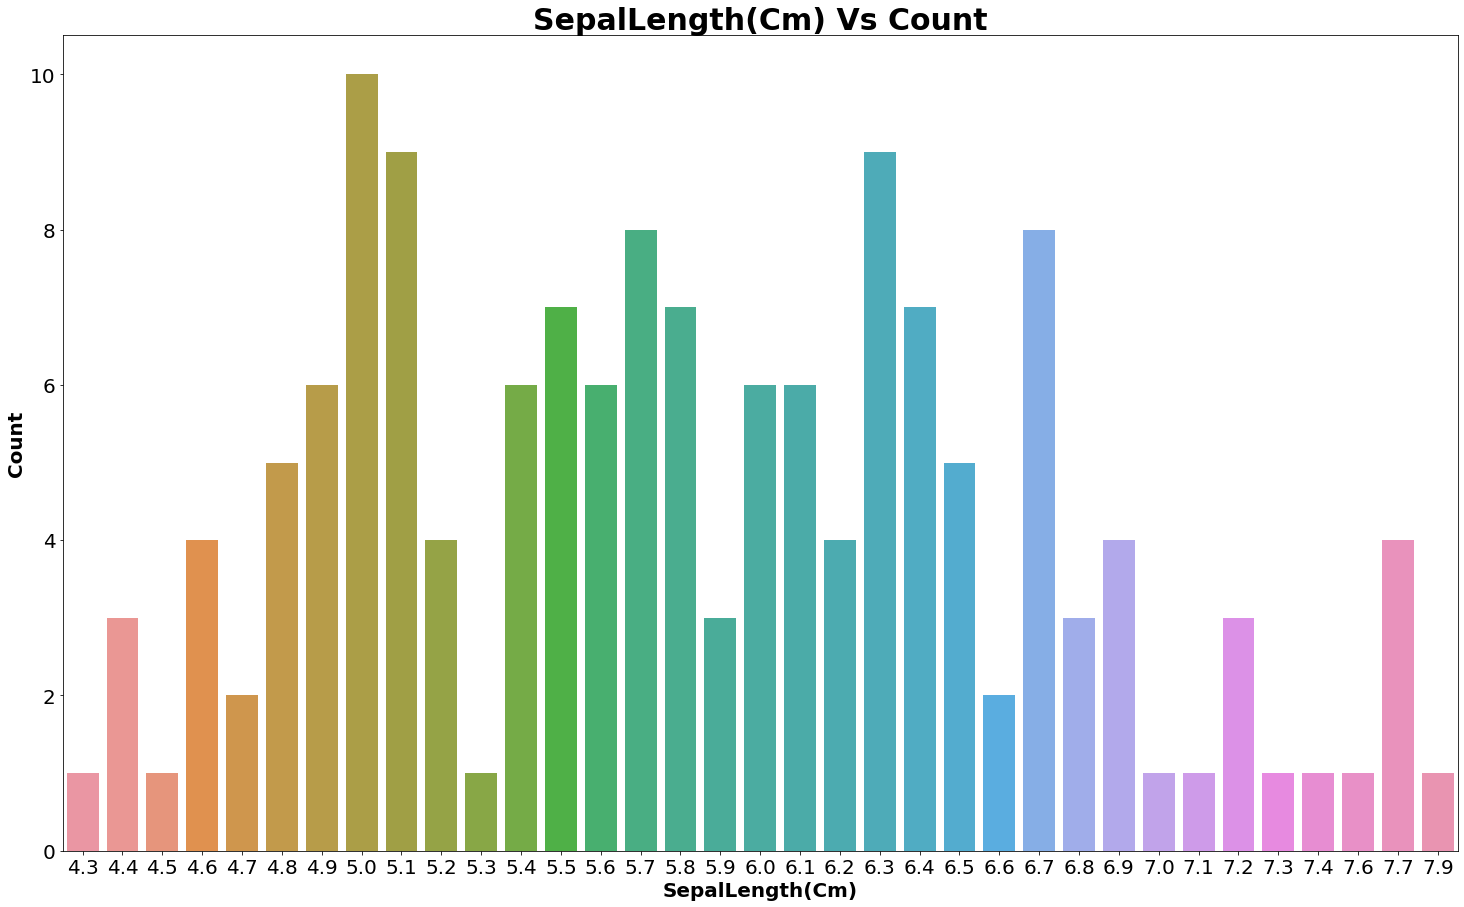

In [12]:
plt.figure(figsize=(25,15))

sns.countplot(data['sepal_length'])

plt.xlabel('SepalLength(Cm)', fontsize=20, fontweight='bold')
plt.ylabel('Count', fontsize=20, fontweight='bold')

plt.title('SepalLength(Cm) Vs Count', fontsize=30, fontweight='bold')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# b) Sepal Width(cm)

In [13]:
data['sepal_width'].nunique()

23

     sepal_width
3.0           26
2.8           14
3.2           13
3.1           12
3.4           12
2.9           10
2.7            9
2.5            8
3.8            6
3.5            6
3.3            6
2.6            5
2.3            4
2.2            3
2.4            3
3.6            3
3.7            3
3.9            2
4.4            1
2.0            1
4.0            1
4.2            1
4.1            1


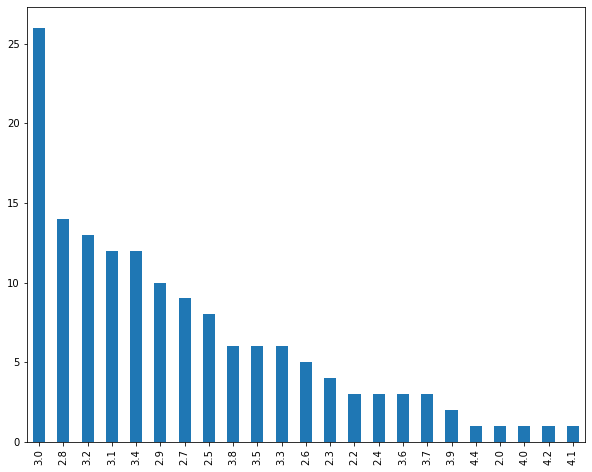

In [14]:
plt.figure(figsize=(10,8))
print(data['sepal_width'].value_counts().to_frame())
data['sepal_width'].value_counts().plot.bar()
plt.show()

# c) Petal Length(cm)

In [15]:
data['petal_length'].nunique()

43

     petal_length
1.5            14
1.4            12
5.1             8
4.5             8
1.6             7
1.3             7
5.6             6
4.0             5
4.9             5
4.7             5
5.0             4
1.7             4
4.8             4
4.4             4
4.2             4
4.1             3
5.7             3
5.5             3
6.1             3
3.9             3
4.6             3
5.8             3
5.2             2
1.9             2
6.0             2
1.2             2
4.3             2
5.3             2
5.4             2
3.3             2
6.7             2
3.5             2
5.9             2
3.6             1
3.8             1
1.0             1
3.0             1
6.3             1
6.6             1
3.7             1
1.1             1
6.4             1
6.9             1


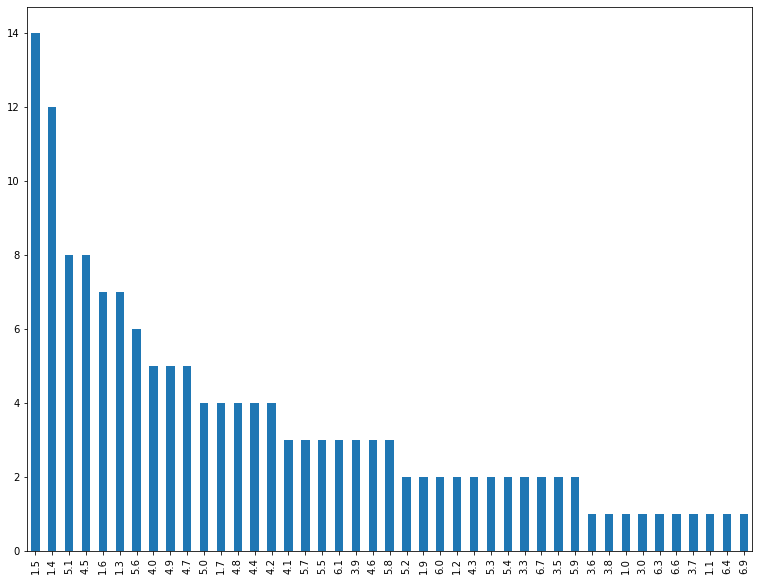

In [16]:
plt.figure(figsize=(13,10))
print(data['petal_length'].value_counts().to_frame())
data['petal_length'].value_counts().plot.bar()
plt.show()

# d) Petal Width(cm)

In [17]:
data['petal_width'].nunique()

22

     petal_width
0.2           28
1.3           13
1.5           12
1.8           12
1.4            8
2.3            8
1.0            7
0.4            7
0.3            7
0.1            6
2.1            6
2.0            6
1.2            5
1.9            5
1.6            4
2.5            3
2.2            3
1.1            3
2.4            3
1.7            2
0.5            1
0.6            1


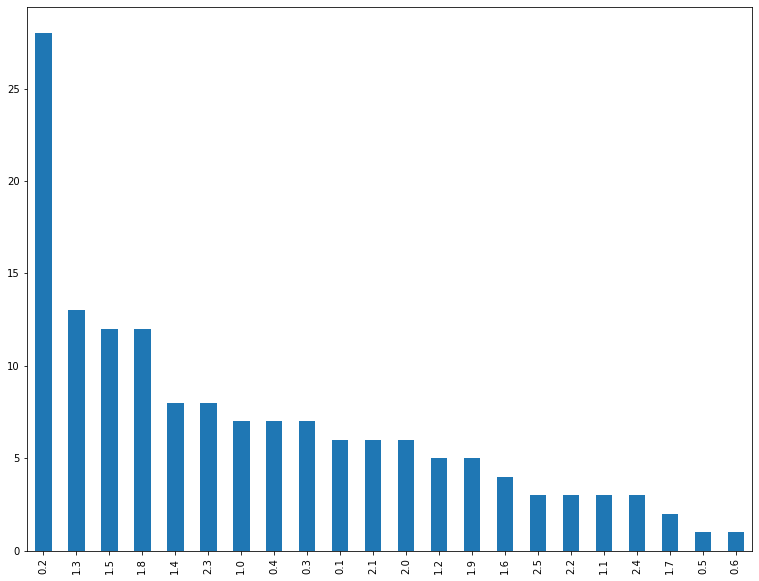

In [18]:
plt.figure(figsize=(13,10))
print(data['petal_width'].value_counts().to_frame())
data['petal_width'].value_counts().plot.bar()
plt.show()

# e) Species

In [19]:
data['species'].nunique()

3

In [20]:
data['species'].unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

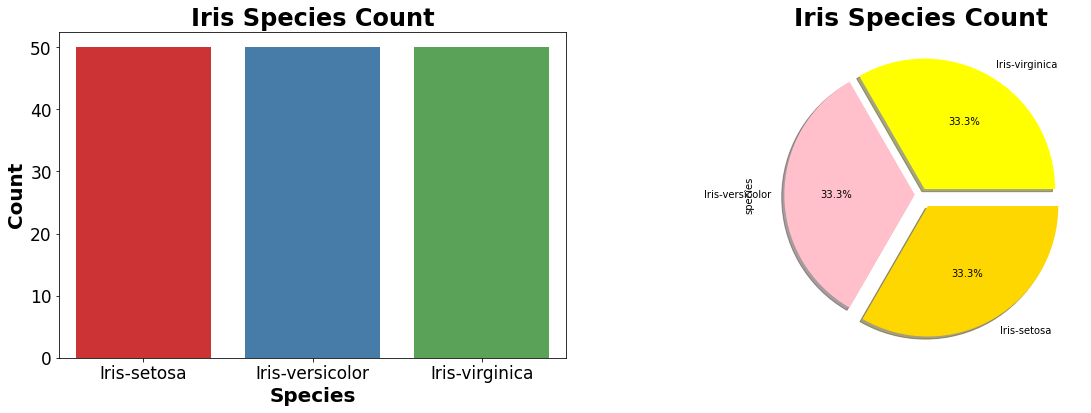

In [21]:
plt.figure(figsize=(20, 6))

cols = ['yellow', 'pink','gold']
plt.subplot(1,2,1)
sns.countplot('species',data=data, palette='Set1')
plt.title('Iris Species Count',fontweight="bold", size=24)
plt.xticks(size=17)
plt.yticks(size=17)
plt.xlabel('Species', fontsize=20, fontweight='bold')
plt.ylabel('Count', fontsize=20, fontweight='bold')

plt.subplot(1,2,2)
data['species'].value_counts().plot.pie(explode=[0.05,0.05,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Iris Species Count',fontweight="bold", size=25)

plt.show()

-In this case we are plotting the frequency of the three species in the Iris Dataset

-We can see that there are 50 samples each of all the Iris Species in the data set.

In [22]:
data_species = data.groupby(data['species']).mean()

<Figure size 720x720 with 0 Axes>

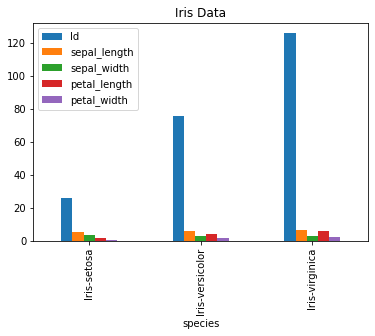

In [23]:
plt.figure(figsize=(10,10))
data_species.plot.bar()
plt.title('Iris Data')
plt.show()

# 2. Clean the data

# a) Drop unwanted features

In [24]:
data.drop("Id", axis=1, inplace=True)

# b) Missing Values

In [25]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# c) Identify Duplicate Values

In [26]:
data[data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [27]:
data.duplicated().value_counts()

False    147
True       3
dtype: int64

In [28]:
data.drop_duplicates(inplace=True)
data.shape

(147, 5)

In [29]:
data.duplicated().any()

False

# 3. Analysis of Relationship between variables

# a) Correlation between features

# i) The correlation between the continuos variables

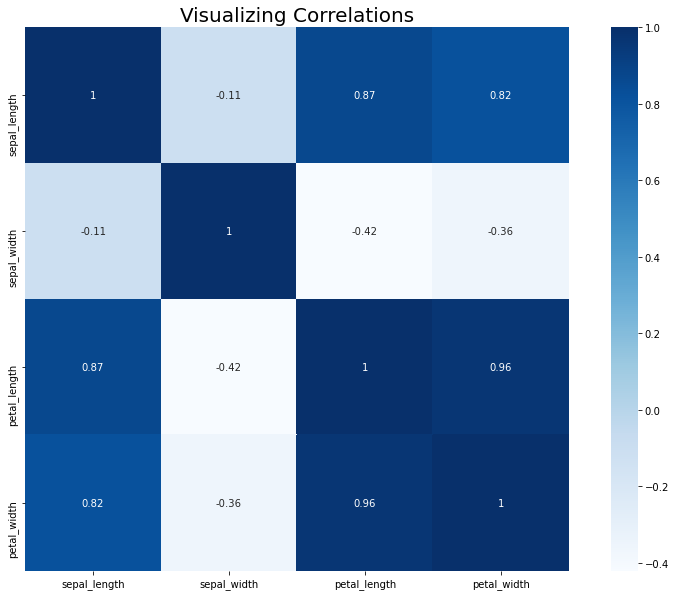

In [30]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

# ii) The correlation between continuos features and target

In [31]:
data.corr()['petal_width']

sepal_length    0.817058
sepal_width    -0.356376
petal_length    0.961883
petal_width     1.000000
Name: petal_width, dtype: float64

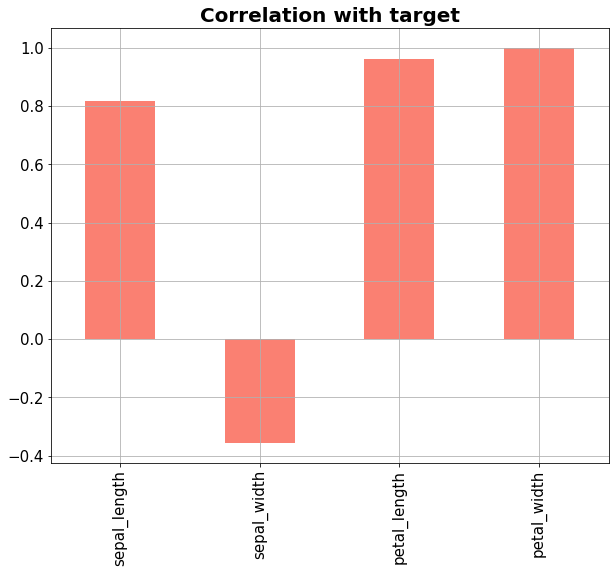

In [32]:
p = data.drop('species', axis=1)
p.corrwith(data['petal_width']).plot(kind='bar', grid=True, figsize=(10,8), color='salmon')
plt.title("Correlation with target", fontweight='bold', size=20)
plt.xticks(size=15, rotation=90)
plt.yticks(size=15)
plt.show()

# b. Outliers

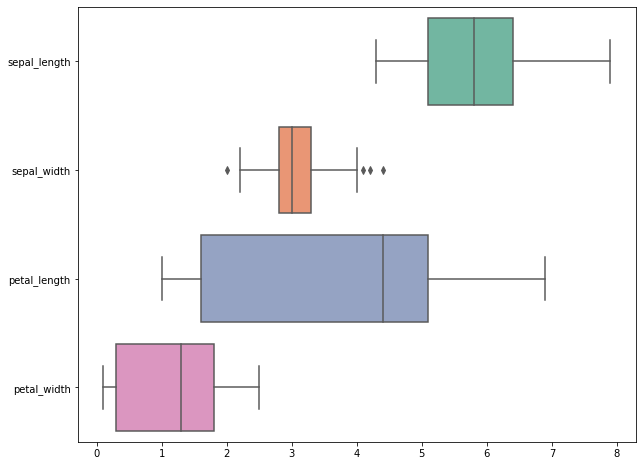

In [33]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data, orient='h', palette='Set2');

# 4. Data Visualization

# a. Univariate Analysis

Univariate analysis is the simplest form of analyzing data. We only take a single variable into consideration and try to find relations based on that.

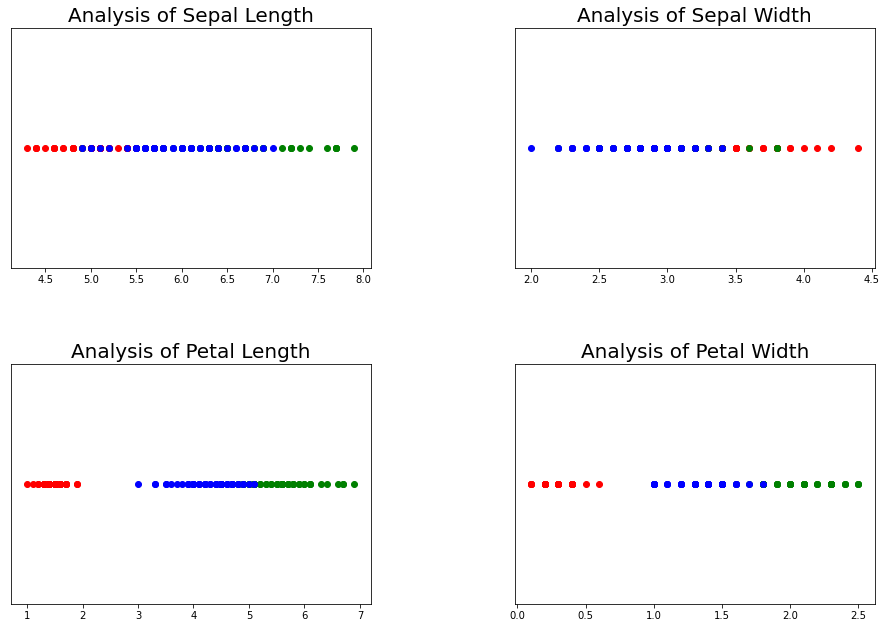

In [34]:
fig = plt.figure(figsize = (15, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot((data[data['species'] == 'Iris-setosa'])['sepal_length'], np.zeros_like((data[data['species'] == 'Iris-setosa'])['sepal_length']), 'ro')
ax1.plot((data[data['species'] == 'Iris-virginica'])['sepal_length'], np.zeros_like((data[data['species'] == 'Iris-virginica'])['sepal_length']), 'go')
ax1.plot((data[data['species'] == 'Iris-versicolor'])['sepal_length'], np.zeros_like((data[data['species'] == 'Iris-versicolor'])['sepal_length']), 'bo')
ax1.set_title('Analysis of Sepal Length', size = 20)
ax1.get_yaxis().set_visible(False)

ax2.plot((data[data['species'] == 'Iris-setosa'])['sepal_width'], np.zeros_like((data[data['species'] == 'Iris-setosa'])['sepal_width']), 'ro')
ax2.plot((data[data['species'] == 'Iris-virginica'])['sepal_width'], np.zeros_like((data[data['species'] == 'Iris-virginica'])['sepal_width']), 'go')
ax2.plot((data[data['species'] == 'Iris-versicolor'])['sepal_width'], np.zeros_like((data[data['species'] == 'Iris-versicolor'])['sepal_width']), 'bo')

ax2.set_title('Analysis of Sepal Width', size = 20)
ax2.get_yaxis().set_visible(False)

ax3.plot((data[data['species'] == 'Iris-setosa'])['petal_length'], np.zeros_like((data[data['species'] == 'Iris-setosa'])['petal_length']), 'ro')
ax3.plot((data[data['species'] == 'Iris-virginica'])['petal_length'], np.zeros_like((data[data['species'] == 'Iris-virginica'])['petal_length']), 'go')
ax3.plot((data[data['species'] == 'Iris-versicolor'])['petal_length'], np.zeros_like((data[data['species'] == 'Iris-versicolor'])['petal_length']), 'bo')
ax3.set_title('Analysis of Petal Length', size = 20)
ax3.get_yaxis().set_visible(False)

ax4.plot((data[data['species'] == 'Iris-setosa'])['petal_width'], np.zeros_like((data[data['species'] == 'Iris-setosa'])['petal_width']), 'ro')
ax4.plot((data[data['species'] == 'Iris-virginica'])['petal_width'], np.zeros_like((data[data['species'] == 'Iris-virginica'])['petal_width']), 'go')
ax4.plot((data[data['species'] == 'Iris-versicolor'])['petal_width'], np.zeros_like((data[data['species'] == 'Iris-versicolor'])['petal_width']), 'bo')
ax4.set_title('Analysis of Petal Width', size = 20)
ax4.get_yaxis().set_visible(False)

plt.subplots_adjust(left = 0.1,
                    bottom = 0.1, 
                    right = 0.9, 
                    top = 0.9, 
                    wspace = 0.4, 
                    hspace = 0.4)
plt.show()

Observations:

1. sepal_length: Iris-setosa has the smallest sepal length. We can see an outlier (red dot) in the graph. Iris-versicolor has a sepal length of about 5 cm to 7 cm. Iris-virginica has the largest sepal length (above 7 cm).

2. sepal_width: Iris-versicolor has the smallest sepal width. The distinction between setosa and virginica is not so prominent in the range of 3.5 cm to 4 cm. However for a sepal width equal to or greater than 4 cm all the flowers belong to the Iris-setosa species.

3. petal_length: Iris-setosa has the smallest petal length. The length of the petals do not exceed 2 cm. For Iris-versicolor the petal length is in the range of 3 cm to 5 cm. Iris-virginica has the largest petal length (5 cm or greater).

4. petal_width: Iris-setosa has the smallest petal width. Iris-versicolor has a petal length from 1 cm to slightly less than 2 cm. Iris-virginica has a petal width that is approximately greater than 1.8 cm.

Boxplots are a standardized way of displaying the distribution of data.

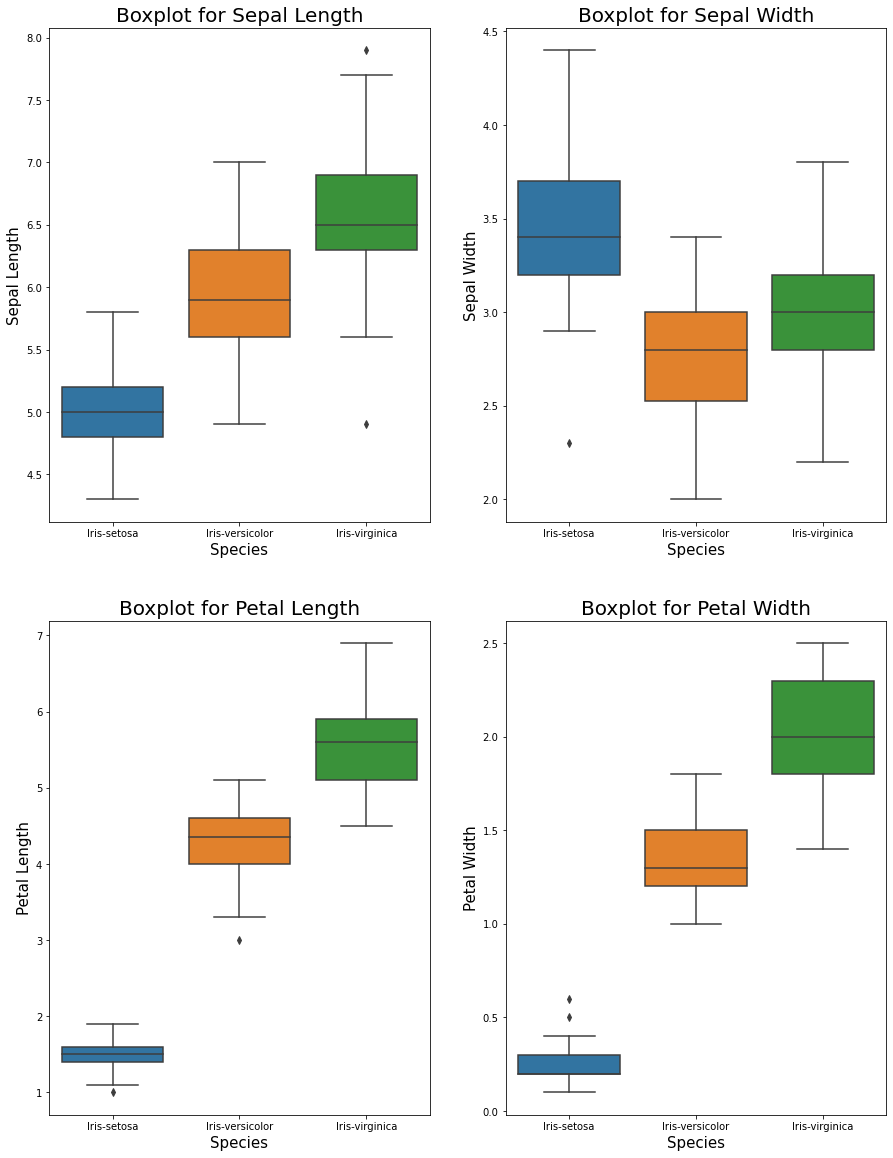

In [35]:
plt.figure(figsize=(15, 20))

def create_boxplot(feature):
    sns.boxplot(data = data, x = 'species', y = feature)
    if(feature == 'sepal_length'):
        feature = 'Sepal Length'
    if(feature == 'sepal_width'):
        feature = 'Sepal Width'
    if(feature == 'petal_length'):
        feature = 'Petal Length'
    if(feature == 'petal_width'):
        feature = 'Petal Width'
    plt.title('Boxplot for ' + feature, fontsize = 20)
    plt.xlabel('Species', fontsize = 15)
    plt.ylabel(feature, fontsize = 15)
      
plt.subplot(221)
create_boxplot('sepal_length')
  
plt.subplot(222)
create_boxplot('sepal_width')
  
plt.subplot(223)
create_boxplot('petal_length')

plt.subplot(224)
create_boxplot('petal_width')
  
plt.show()

# b. Bivariate Analysis

Bivariate analysis is a form of statistical analysis. It involves the analysis of two variables for the purpose of determining the relationship between them.

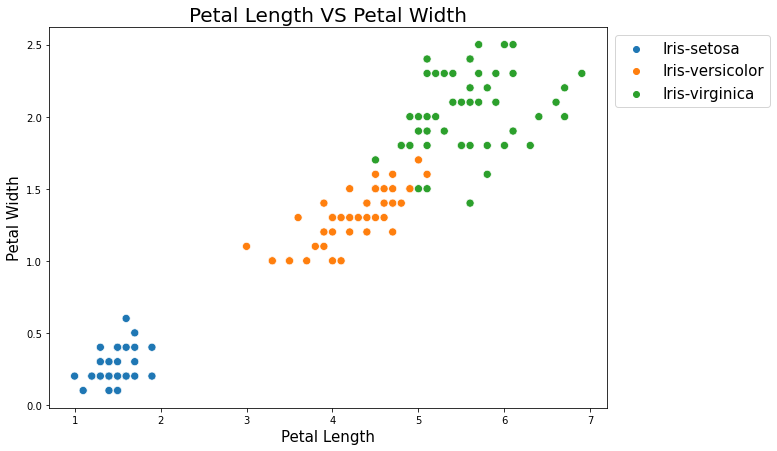

In [36]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'petal_length', y = 'petal_width', hue = 'species', data = data, s = 65)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, fontsize = 15)
plt.title('Petal Length VS Petal Width', fontsize = 20)
plt.xlabel('Petal Length', fontsize = 15)
plt.ylabel('Petal Width', fontsize = 15)
plt.show()

We can see that the petal length and petal width is the least for Iris-setosa. The petal width and length for Iris-versicolor lies in an intermediate range, between that of setosa and virginica. Iris-virginica has the largest petal length and width. A few outliers exist in the case of both versicolor and virginica.

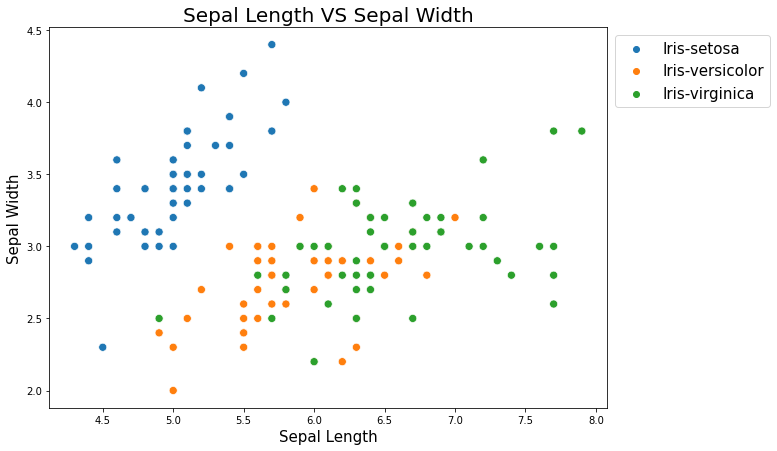

In [37]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', data = data, s = 65)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, fontsize = 15)
plt.title('Sepal Length VS Sepal Width', fontsize = 20)
plt.xlabel('Sepal Length', fontsize = 15)
plt.ylabel('Sepal Width', fontsize = 15)
plt.show()

We can observe that Iris-setosa has a relatively lower sepal length (as compared to versicolor or virginica). Iris-setosa has a large sepal width. It is hard to distinguish between versicolor and virginica based on sepal length and width.

# c. Multivariate Analysis

It refers to an analysis involving multiple dependent variables resulting in one outcome.

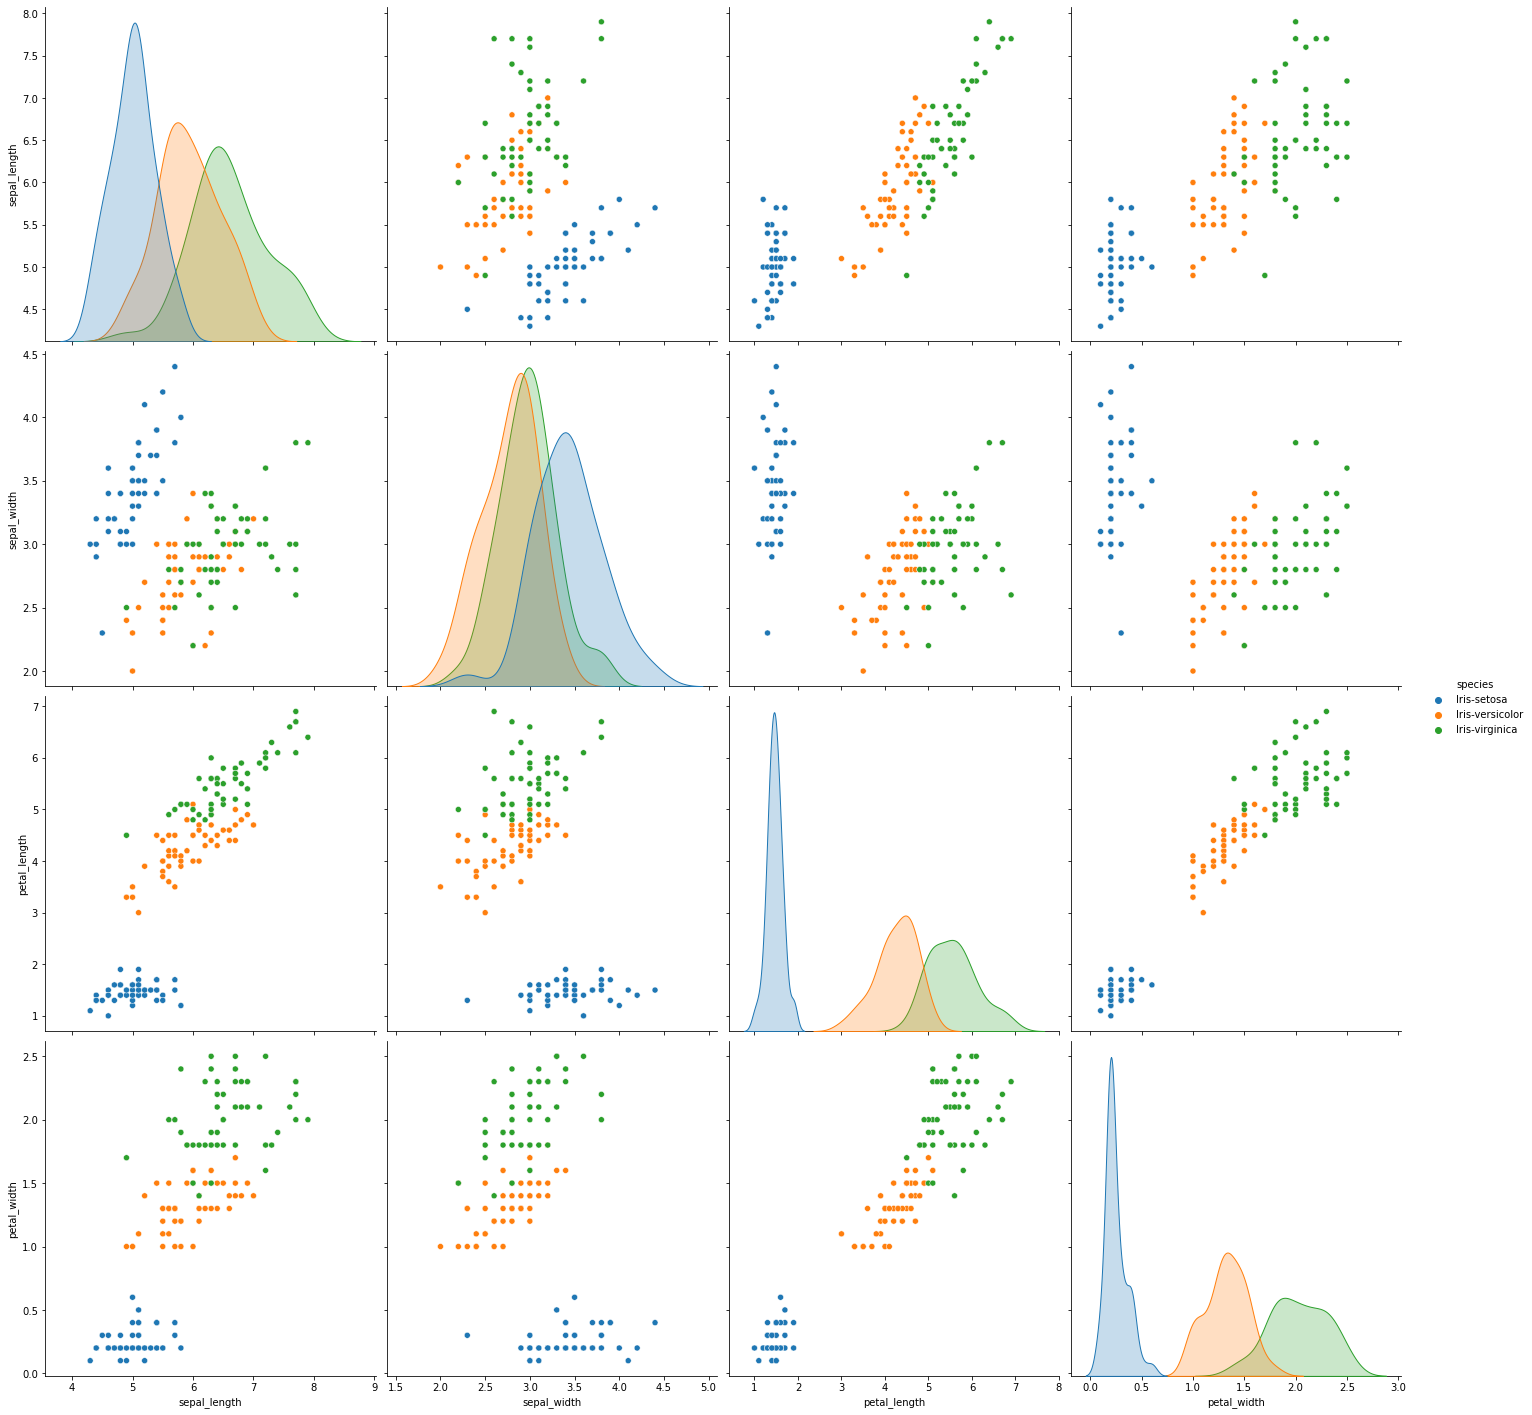

In [38]:
sns.pairplot(data, hue = 'species', height = 5)
plt.show()

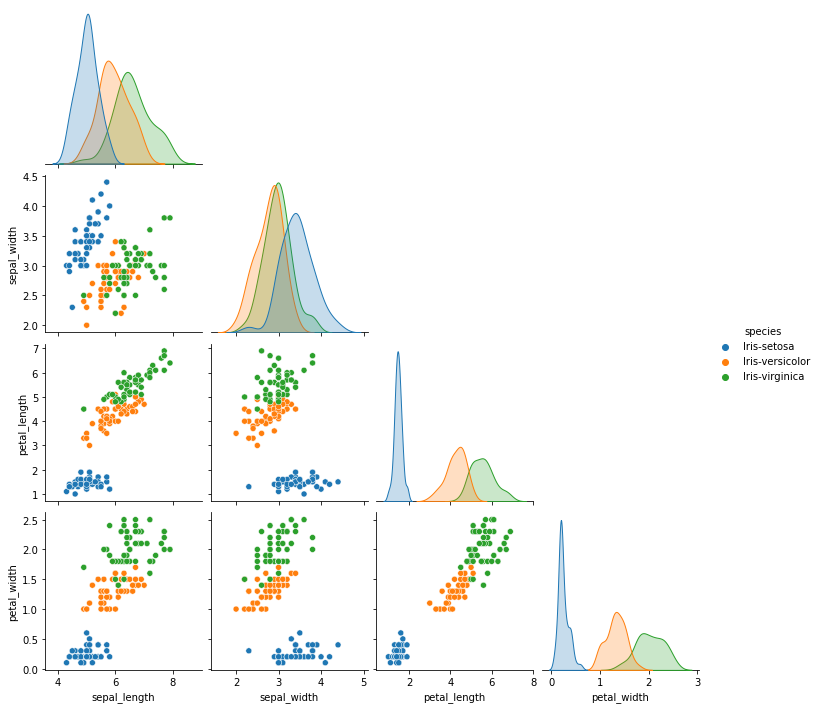

In [39]:
# Pairplot
sns.pairplot(data, hue='species', corner=True)
plt.show()

- After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in blue) is distinctly different from those of the other two species.

- There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).

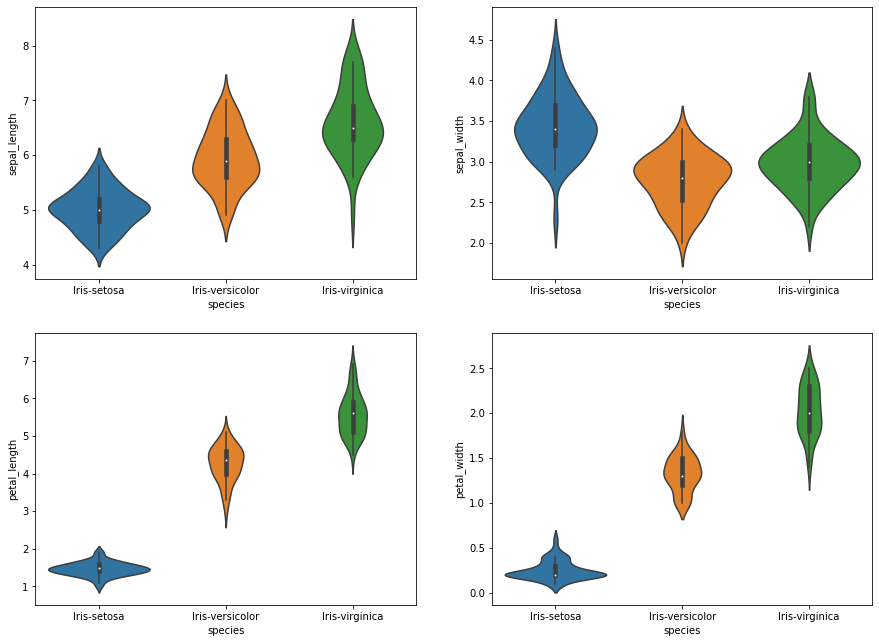

In [40]:
plt.figure(figsize=(15,11));
plt.subplot(2,2,1)
sns.violinplot(x='species', y='sepal_length', data=data)
plt.subplot(2,2,2)
sns.violinplot(x='species', y='sepal_width', data=data)
plt.subplot(2,2,3)
sns.violinplot(x='species', y='petal_length', data=data)
plt.subplot(2,2,4)
sns.violinplot(x='species', y='petal_width', data=data);

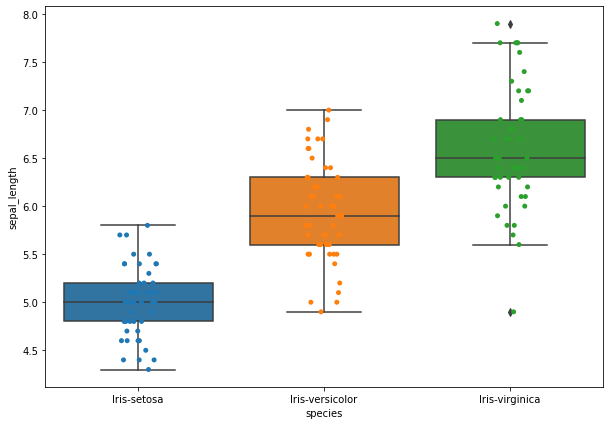

In [41]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='species', y='sepal_length',data=data)
fig=sns.stripplot(x='species', y='sepal_length',data=data, jitter=True, edgecolor='gray')

# 5. Logistic Regression

Logistic regression, despite its name, is a classification model rather than regression model. It is a process of modeling the probability of a discrete outcome given input variables.

ML model only handles numeric data.
We have numeric data for all the columns except species.

Replacing iris-setosa as 1, iris-versicolor as 2 and iris-virginica as 3. Since, ML model only accepts only numeric data.

In [42]:
data['species'] = data['species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

In [43]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


Before I create the multiclass logistic regression model, i will split the data into training and testing dataset.
In oder to do that, i will import train_test_split which I imported earlier from sklearn.

I'm going to give independent parameters like sepal_length,sepal_width,petal_length,petal_width x parameter and dependent atrribute is species which is y parameter.
For training, 70% of the dataset is used and for testing 30% of the dataset is used.
The independent attribute of train and test set is denoted by 'X'.
The dependent attribute of train and test set is denoted by 'y'.

In [44]:
#The output of this data is stored in X_train , X_test , y_train , y_test.
X_train, X_test, y_train, y_test = train_test_split(data[['sepal_length','sepal_width','petal_length','petal_width']],data['species'], test_size=0.3)

In [45]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
98,5.1,2.5,3.0,1.1
62,6.0,2.2,4.0,1.0
10,5.4,3.7,1.5,0.2
36,5.5,3.5,1.3,0.2
127,6.1,3.0,4.9,1.8
...,...,...,...,...
112,6.8,3.0,5.5,2.1
18,5.7,3.8,1.7,0.3
119,6.0,2.2,5.0,1.5
49,5.0,3.3,1.4,0.2


Here, there are 102 rows and 4 columns for training set which consists of independent variables.

In [46]:
y_train

98     2
62     2
10     1
36     1
127    3
      ..
112    3
18     1
119    3
49     1
21     1
Name: species, Length: 102, dtype: int64

Here, y_train consists of dependent variable 'species' with 102 rows.

In [47]:
from sklearn import linear_model 

mymodel = linear_model.LogisticRegression(max_iter=130) 
mymodel.fit(X_train,y_train)

LogisticRegression(max_iter=130)

We can see that this ML model has run without any erros,now i can use this model to make predictions

In [48]:
y_test = mymodel.predict(X_test)
y_test

array([3, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 3, 3, 2,
       1, 3, 3, 3, 3, 1, 3, 3, 2, 1, 2, 2, 3, 1, 2, 1, 2, 2, 3, 1, 3, 2,
       3], dtype=int64)

The above outputs are the prediction made by the model for the test dataset.

In [49]:
y_pred = mymodel.score(X_test, y_test)
y_pred

1.0

Hence, this shows that my model is 100% accurate.

In [50]:
y_score = mymodel.decision_function(X_test)
y_score

array([[-5.02613233,  1.37830058,  3.64783175],
       [-5.32414326,  1.81776663,  3.50637663],
       [ 6.63410793,  2.76906432, -9.40317226],
       [-1.43578269,  1.9943305 , -0.55854781],
       [-2.35218008,  2.36198311, -0.00980303],
       [-1.0561659 ,  2.25837259, -1.2022067 ],
       [-0.02049601,  2.42283026, -2.40233425],
       [-0.5624622 ,  2.34549572, -1.78303353],
       [-3.04609666,  2.43604499,  0.61005167],
       [ 5.31403023,  2.43456505, -7.74859528],
       [-2.35519481,  1.67950779,  0.67568703],
       [-3.45636011,  1.65378607,  1.80257404],
       [-1.74782242,  1.98854738, -0.24072496],
       [-6.25076125,  1.47984837,  4.77091288],
       [ 6.74635298,  2.53719704, -9.28355002],
       [-5.1994605 ,  1.80245694,  3.39700356],
       [ 6.18767972,  2.75733585, -8.94501558],
       [ 0.42720526,  2.17585489, -2.60306015],
       [ 5.7723703 ,  2.49432512, -8.26669543],
       [-4.72138766,  1.73142916,  2.9899585 ],
       [-8.33947706,  2.02098506,  6.318

In [51]:
#I'm going to store predict output in variable called predicted_output
predicted_output = mymodel.predict(X_test)
predicted_output

array([3, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 3, 3, 2,
       1, 3, 3, 3, 3, 1, 3, 3, 2, 1, 2, 2, 3, 1, 2, 1, 2, 2, 3, 1, 3, 2,
       3], dtype=int64)

It is an array that contains output predicted by the model.

#  Confusion matrix

The confusion matrix, also known as the error matrix, allows visualization of the performance of an algorithm :

- true positive (TP) : Malignant tumour correctly identified as malignant
- true negative (TN) : Benign tumour correctly identified as benign
- false positive (FP) : Benign tumour incorrectly identified as malignant
- false negative (FN) : Malignant tumour incorrectly identified as benign

cm is the instance of confusion_matrix class and i have passed two inputs.
y_test is the actual output.
We are creating cm for actual vs predicted output.

In [52]:
cm = confusion_matrix(y_test, predicted_output)
cm 

array([[11,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 17]], dtype=int64)

From the answer, we can see that there is 3 possible outcome that our model can predict.
Hence, we've got 3x3 array.

Text(24.0, 0.5, 'Truth or Actual Value')

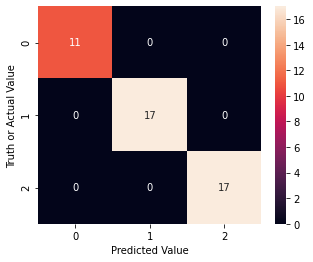

In [53]:
plt.figure(figsize = (5,4))  
sn.heatmap(cm, annot=True)   

plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

Here, in x-axis we have predicted value and in y-axis, we have truth or actual value.


We can see that there is no values which is predicted wrong so my model is 100% accurate.

# Summary

Our model have accurately labeled 100% of the test data.This is just the beginning however. We could try to increase/decrease the accuracy even higher by using a different algorithm other than the logistic regression, or try our model with different set of variables. There are defintely many more things that could be done to modify our model, but I will conclude this report here for now.